___
# PROJETO 1

## <font color='red'>Henrique Tortorella</font>
___

## <font color='blue'>Como a educação está relacionada com o aumento da renda dos aposentados</font>

## Introdução

Neste trabalho busco mostrar a importância da educação, e como seu aumento está relacionado com varias outras coisas muito importantes, como a renda. Neste trabalho me concentrei em demostrar que o aumento da educação está diretamente relacionado ao aumento da renda das pessoas, em especial dos aposentados. A pergunta é: Será que o aumento da educação está conectado com o aumento da renda? 

___
## Análise e Resultados

In [148]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [149]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\henri\Desktop\faculdade\2-semestre\ciência dos dados\projetos\projeto 1


In [150]:
#Leitura da base já em formato de DataFrame e extensão .csv
pnad2014 = pd.read_csv('PNAD2014.csv', sep=',')

pnad2001 = pd.read_csv('PNAD2001.csv', sep=',')


___

In [151]:
#renomeando a categoria da quantidade de salários
pnad2014.V4743 = pnad2014.V4743.astype('category')
pnad2014.V4743.cat.categories = ('Sem rendimento','Até ¼ S.M','Mais de ¼ até ½ S.M','Mais de ½ até 1 S.M','Mais de 1 até 2 S.M','Mais de 2 até 3 S.M','Mais de 3 até 5 S.M','Mais de 5 S.M','Sem declaração')

pnad2001.v9533 = pnad2001.v9533.astype('category')
pnad2001.v9533.cat.categories = ('Até ½ S.M','Mais de ½ até 1 S.M','Mais de 1 até 2 S.M','Mais de 2 até 3 S.M','Mais de 3 até 5 S.M','Mais de 5 S.M','Mais de 5 S..M','mais de 5 S..M','Sem declaração','Prejuízo')


In [152]:
#trocando as variaveis de nome para facilitar o trabalho
aposentados = pnad2014.V9122
regioes = pnad2014.V4728
estudo = pnad2014.V4838
salario = pnad2014.V4743


aposentados_1= pnad2001.v9122
regioes_1 = pnad2001.v4728
estudo_1 = pnad2001.v4788
salario_1 = pnad2001.v9533

aposentados_14 = pnad2014.V9122[pnad2014.V9122==2]
n_14 = aposentados_14.shape[0]
pnad2014.head()



,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3,500,Mais de ½ até 1 S.M,3,1,2,2,1,500,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3,500,Mais de ½ até 1 S.M,4,2,NaN,2,1,500,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3,500,Mais de ½ até 1 S.M,1,NaN,NaN,NaN,NaN,500,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2,1150,Mais de 1 até 2 S.M,2,1,2,2,1,1150,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2,1150,Mais de 1 até 2 S.M,3,1,2,2,1,1150,20160623


## <font color='green'>Analisandos a quantidade de aposentados e não aposentados em 2014</font>

In [153]:
#imprimindo a quantidade de pessoas aposentadas e não aposentadas em 2014
total_14 = pnad2014.shape[0]
print('O total de pessoas da PNAD de 2014 é:', total_14)


print('A quantidade de aposentados em 2014 é de:',n_14)


O total de pessoas da PNAD de 2014 é: 362627
A quantidade de aposentados em 2014 é de: 38643


In [154]:
pd.DataFrame(aposentados_14.iloc[0:10])


,V9122
5,2
11,2
25,2
26,2
51,2
62,2
66,2
77,2
82,2
87,2


In [208]:
#imprimindo em porcentagem a quantidade de pessoas aposentadas e não aposentadas

ut2 = (pnad2014.V9122.value_counts()/total_14*100).round(decimals=1).reindex([2,4])
print('a quantidade de pessoas aposentadas e nao aposentadas em %:')
print(ut2)

a quantidade de pessoas aposentadas e nao aposentadas em %:
2    10.7
4    75.3
Name: V9122, dtype: float64


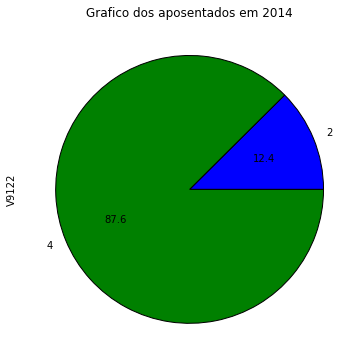

In [156]:
#plotando o grafico de aposentados e nao aposentados em %, em 2014
plot = ut2.plot(kind='pie',title='Grafico dos aposentados em 2014',autopct='%.1f',figsize=(6, 6))

## <font color='green'>Analise da quantidade de aposentados e não aposentados em 2001</font>

In [157]:
pnad2001.head()


,v0101,uf,v0102,v0103,v0301,v0302,v3031,v3032,v3033,v8005,...,v2201,v2202,v1623,v1624,v1625,v1626,v1627,v1628,v1629,v1630
0,2001,11,11000000,1,4,4,18,7,1978,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,11,11000000,1,3,2,3,5,1977,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,11,11000000,1,5,4,19,7,1998,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,11,11000000,1,2,4,6,5,1982,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,11,11000000,1,1,4,21,7,1957,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
aposentados_01 = pnad2001.v9122[pnad2001.v9122==2]

n_01 = aposentados_01.shape[0]

In [159]:
#imprimindo a o total de aposentados e não aposentados em 2001
total_01 = pnad2001.shape[0]
print('O total de pessoas da PNAD de 2001 é:', total_01)

print('A quantidade de aposentados em 2001 é de:',n_01)

O total de pessoas da PNAD de 2001 é: 378843
A quantidade de aposentados em 2001 é de: 29975


In [160]:
pd.DataFrame(aposentados_01.iloc[0:10])

,v9122
11,2
21,2
33,2
54,2
55,2
65,2
66,2
73,2
75,2
83,2


In [161]:
#imprimindo a o total de aposentados e não aposentados em 2014 (em %)
ut3 = (pnad2001.v9122.value_counts()/total_01*100).round(decimals=1).reindex([2,4])
print(ut3)


2     7.9
4    82.7
Name: v9122, dtype: float64


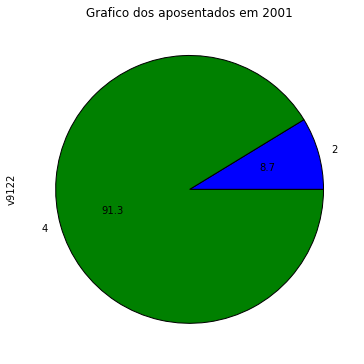

In [209]:
#plotando o gráfico de aposentados e não aposentados em 2001
plot = ut3.plot(kind='pie',title='Grafico dos aposentados em 2001',autopct='%.1f',figsize=(6, 6))

## <font color='red'>Analise de aposentados e não aposentados, que moram ou em areas rurais ou urbanas em 2014</font>

In [163]:

ut1 = (pnad2014.V4728.value_counts()/total_14*100).round(decimals=1).reindex([1,8])
print(ut1)


1    83.4
8    11.5
Name: V4728, dtype: float64


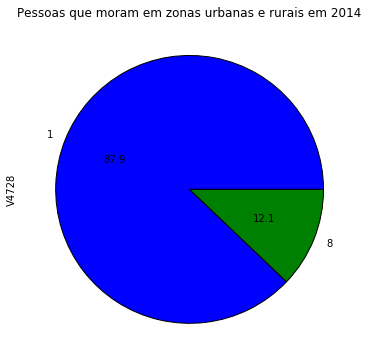

In [210]:
#plotando a porcentagem de pessoas que moram ou em areas urbanas(1) ou em areas rurais(8)
plot = ut1.plot(kind='pie',title='Pessoas que moram em zonas urbanas e rurais em 2014',autopct='%.1f',figsize=(6, 6))


In [165]:
#criação de tabela entre aposentados e regiões
print('tabela cruzada entre regioes e aposentados em 2014')
tabela1=pd.crosstab(aposentados, regioes,margins=True,rownames=['Aposentados'], colnames=['Regioes'])
tabela1



tabela cruzada entre regioes e aposentados em 2014


Regioes,1,2,3,4,5,6,7,8,All
Aposentados,,,,,,,,,
2.0,30910,531,193,89,988,22,53,5857,38643
4.0,230312,4209,1744,1123,5786,198,366,29380,273118
All,302604,5598,2275,1437,8118,268,530,41797,362627


grafico entre regioes e aposentados e nao aposentados em 2014


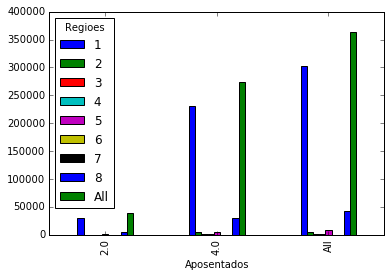

In [166]:
#criando grafico da tabela superior
print('grafico entre regioes e aposentados e nao aposentados em 2014')
pd.crosstab(aposentados, regioes,margins=True,rownames=['Aposentados'], colnames=['Regioes']).plot(kind='bar')



In [167]:
#criando tabela das pessoa que sao aposentadas e moram em regioes ou urbanas ou rurais
print('tabela cruzada entre regioes e aposentados em 2014 em porcentagem')
tabelap=(tabela1/total_14*100).round(decimals=1)
tabelap.iloc[0:1,]

tabela cruzada entre regioes e aposentados em 2014 em porcentagem


,1,2,3,4,5,6,7,8,All
Aposentados,,,,,,,,,
2,8.5,0.1,0.1,0,0.3,0,0,1.6,10.7


grafico da freq relativa de aposentados em cada regiao em 2014:


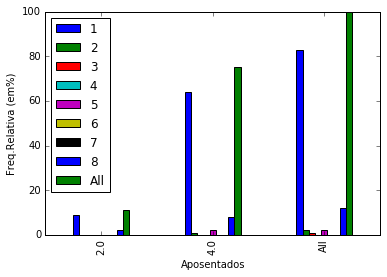

In [168]:
#criando grafico de aposentados e nao aposentados que moram ou em regioes rurais ou urbanas
print('grafico da freq relativa de aposentados em cada regiao em 2014:')
grafico = pd.crosstab(aposentados,regioes,margins=True,rownames=['Aposentados'], colnames=['Regioes'])
grafico = (grafico/ total_14*100).round(decimals=0)

plot = grafico.plot(kind='bar')

plt.ylabel('Freq.Relativa (em%)')

## <font color='red'>Analise de aposentados e não aposentados, que moram ou em areas rurais ou urbanas em 2001</font>

In [169]:
#separando a quantidade de pessoas que moram em areas rurais(8) ou urbanas(1)
ut4 = (regioes_1.value_counts()/total_01*100).round(decimals=1).reindex([1,8])
print(ut4)


1    84.7
8    12.1
Name: v4728, dtype: float64


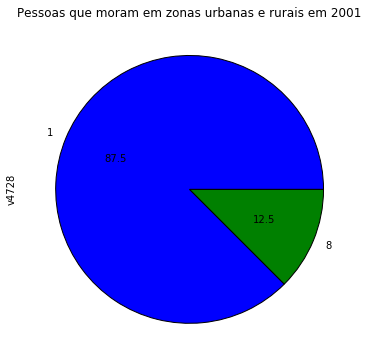

In [170]:
#criando gráfico da quantidade de pessoas que moram em area rurais ou urbanas em 2014
plot = ut4.plot(kind='pie',title='Pessoas que moram em zonas urbanas e rurais em 2001',autopct='%.1f',figsize=(6, 6))

In [171]:
#tabela de aposentados e nao aposentados, e quantidade que moram em areas rurais ou urbanas
print('tabela cruzada entre regioes e aposentados em 2001')
tabela2=pd.crosstab(aposentados_1, regioes_1,margins=True,rownames=['Aposentados'], colnames=['Regioes'])
tabela2

tabela cruzada entre regioes e aposentados em 2001


Regioes,0.0,1.0,2.0,3.0,4.0,5.0,7.0,8.0,All
Aposentados,,,,,,,,,
2.0,0,24386,190,114,44,460,15,4764,29975
4.0,1,267173,2810,1624,1035,4030,152,36413,313246
All,5,321062,3398,1969,1213,5019,208,45938,378843


grafico entre regioes e aposentados e nao aposentados em 2014


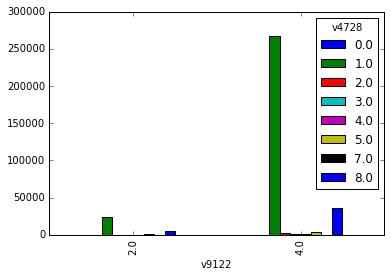

In [172]:

print('grafico entre regioes e aposentados e nao aposentados em 2014')
pd.crosstab(aposentados_1, regioes_1).plot(kind='bar')

In [173]:
print('tabela cruzada entre regioes e aposentados em 2001 em porcentagem')
tabelap2=(tabela2/total_01*100).round(decimals=1)
tabelap2.iloc[0:1,]

tabela cruzada entre regioes e aposentados em 2001 em porcentagem


,0.0,1.0,2.0,3.0,4.0,5.0,7.0,8.0,All
Aposentados,,,,,,,,,
2,0,6.4,0.1,0,0,0.1,0,1.3,7.9


grafico da freq relativa de aposentados em cada regiao em 2001:


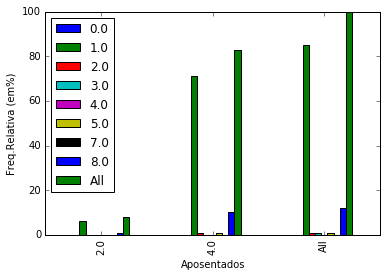

In [174]:
print('grafico da freq relativa de aposentados em cada regiao em 2001:')
grafico2 = pd.crosstab(aposentados_1,regioes_1,margins=True,rownames=['Aposentados'], colnames=['Regioes'])
grafico2 = (grafico2/ total_01*100).round(decimals=0)

plot = grafico2.plot(kind='bar')


plt.ylabel('Freq.Relativa (em%)')

## <font color='orange'>Analise de aposentados e não aposentados, comparando com anos de estudos em 2014 (separados em categorias)</font>

In [175]:
print('porcentagem doa anos de estudo para as pessoas:')

ut5 = (estudo.value_counts()/total_14*100).round(decimals=1)
print(ut5)

porcentagem doa anos de estudo para as pessoas:
5    24.9
3    21.7
1    19.1
4    14.9
2    11.2
6     8.1
7     0.1
Name: V4838, dtype: float64


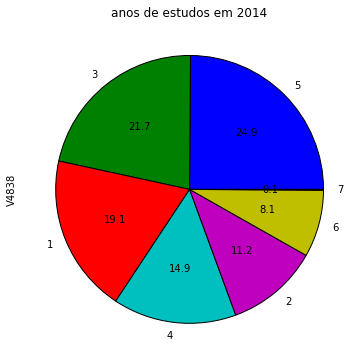

In [176]:
plot = ut5.plot(kind='pie',title='anos de estudos em 2014',autopct='%.1f',figsize=(6, 6))

In [177]:

faixa = range(1,8,1)
frequencia = pd.cut(estudo, faixa)
frequencia.value_counts()



(4, 5]    90250
(2, 3]    78829
(3, 4]    54006
(1, 2]    40564
(5, 6]    29345
(6, 7]      394
dtype: int64

histograma entre anos de estudo para toda a população da Pnad em 2014


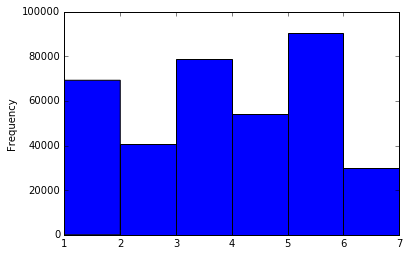

In [178]:
print('histograma entre anos de estudo para toda a população da Pnad em 2014')
plot = estudo.plot.hist(bins=faixa)

In [179]:
print('tabela cruzada entre anos de estudo e aposentados em 2014')
tabela3=pd.crosstab(aposentados, estudo,margins=True,rownames=['Aposentados'], colnames=['anos de estudo'])
tabela3

tabela cruzada entre anos de estudo e aposentados em 2014


anos de estudo,1,2,3,4,5,6,7,All
Aposentados,,,,,,,,
2.0,9827,6133,9668,3372,5718,3905,20,38643
4.0,17628,25428,69082,50634,84532,25440,374,273118
All,69239,40564,78829,54006,90250,29345,394,362627


grafico entre anos de estudo e aposentados e nao aposentados em 2014


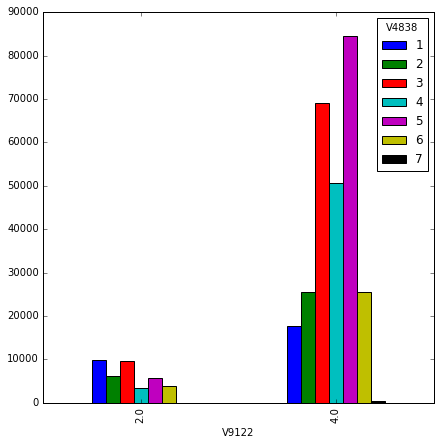

In [180]:
print('grafico entre anos de estudo e aposentados e nao aposentados em 2014')
pd.crosstab(aposentados, estudo).plot(kind='bar',figsize=(7,7))

In [181]:

print('tabela cruzada entre anos de estudo e aposentados em 2014 em porcentagem')
tabelap3=(tabela3/total_14*100).round(decimals=2)
tabelap3.iloc[0:1,]

tabela cruzada entre anos de estudo e aposentados em 2014 em porcentagem


,1,2,3,4,5,6,7,All
Aposentados,,,,,,,,
2,2.71,1.69,2.67,0.93,1.58,1.08,0.01,10.66


grafico da freq relativa de anos de estudo dos aposentados em 2014:


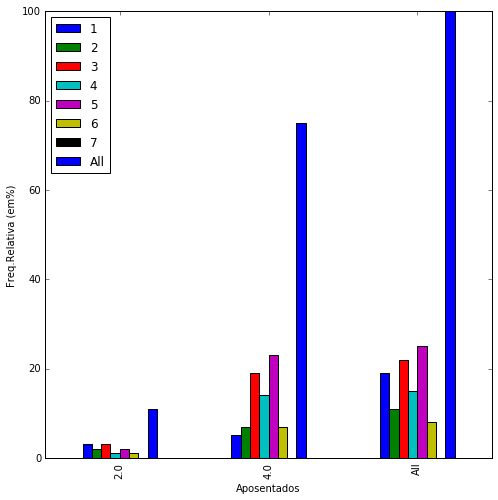

In [182]:
print('grafico da freq relativa de anos de estudo dos aposentados em 2014:')
grafico3 = pd.crosstab(aposentados,estudo,margins=True,rownames=['Aposentados'], colnames=['anos de estudos'])
grafico3 = (grafico3/ total_14*100).round(decimals=0)

plot = grafico3.plot(kind='bar',figsize=(8,8))


plt.ylabel('Freq.Relativa (em%)')

[0.5, 1.5, -2, 10]

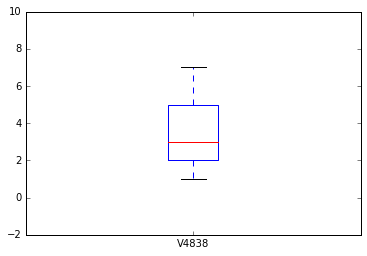

In [183]:
estudo.plot (kind='box') 
plt.axis([0.5,1.5,-2,10])

## <font color='orange'>Analise de aposentados e não aposentados, comparando com anos de estudos em 2001 (separados em categorias)</font>

In [184]:
print('porcentagem doa anos de estudo para as pessoas de 2001:')

ut6 = (estudo_1.value_counts()/total_01*100).round(decimals=1)
print(ut6)

porcentagem doa anos de estudo para as pessoas de 2001:
3    26.8
2    16.4
1    16.3
5    14.0
4    12.9
6     3.8
7     0.4
0     0.0
Name: v4788, dtype: float64


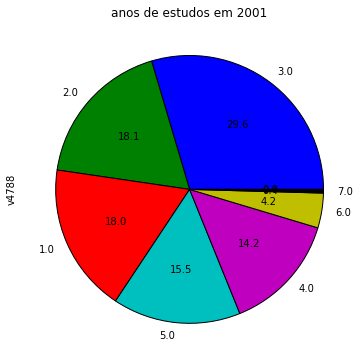

In [185]:
ut6.plot(kind='pie',title='anos de estudos em 2001',autopct='%.1f',figsize=(6, 6))

In [186]:
faixa_1 = range(1,8,1)
frequencia = pd.cut(estudo_1, faixa_1)
frequencia.value_counts()


(2, 3]    101589
(1, 2]     62141
(4, 5]     53014
(3, 4]     48809
(5, 6]     14377
(6, 7]      1404
dtype: int64

histograma entre anos de estudo para toda a população da Pnad em 2001


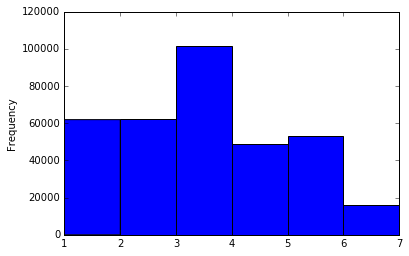

In [187]:
print('histograma entre anos de estudo para toda a população da Pnad em 2001')
plot = estudo_1.plot.hist(bins=faixa_1)

In [188]:
print('tabela cruzada entre anos de estudo e aposentados em 2001')
tabela4=pd.crosstab(aposentados_1, estudo_1,margins=True,rownames=['Aposentados'], colnames=['anos de estudo'])
tabela4

tabela cruzada entre anos de estudo e aposentados em 2001


anos de estudo,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
Aposentados,,,,,,,,
2.0,10244,5313,7100,1916,3272,2112,16,29975
4.0,51663,56822,94478,46889,49739,12265,1381,313246
All,61917,62141,101589,48809,53014,14377,1404,378843


grafico entre anos de estudo e aposentados e nao aposentados em 2001


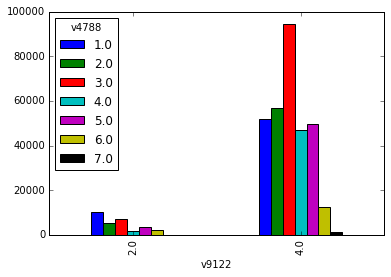

In [189]:
print('grafico entre anos de estudo e aposentados e nao aposentados em 2001')
pd.crosstab(aposentados_1, estudo_1).plot(kind='bar')


In [190]:
print('tabela cruzada entre anos de estudo e aposentados em 2001 em porcentagem')
tabelap4=(tabela4/total_01*100).round(decimals=2)
tabelap4.iloc[0:1,]

tabela cruzada entre anos de estudo e aposentados em 2001 em porcentagem


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
Aposentados,,,,,,,,
2,2.7,1.4,1.87,0.51,0.86,0.56,0,7.91


grafico da freq relativa de anos de estudo dos aposentados em 2001:


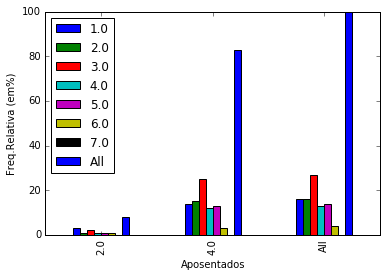

In [191]:
print('grafico da freq relativa de anos de estudo dos aposentados em 2001:')
grafico4 = pd.crosstab(aposentados_1,estudo_1,margins=True,rownames=['Aposentados'], colnames=['anos de estudos'])
grafico4 = (grafico4/ total_01*100).round(decimals=0)

plot = grafico4.plot(kind='bar')


plt.ylabel('Freq.Relativa (em%)')

[0.5, 1.5, -2, 10]

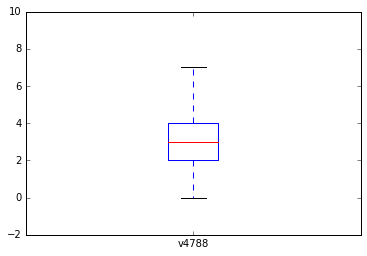

In [192]:
estudo_1.plot(kind= 'box')
plt.axis([0.5,1.5,-2,10])


## <font color='blue'>Analise da renda(em quantidades de salários minimos) de aposentados e não aposentados, em 2014 </font>

In [193]:
ut7 = (salario.value_counts()/total_14*100).round(decimals=1)
print(ut7)

Mais de ½ até 1 S.M    29.3
Mais de 1 até 2 S.M    24.4
Mais de ¼ até ½ S.M    17.8
Até ¼ S.M               8.1
Mais de 2 até 3 S.M     7.6
Mais de 3 até 5 S.M     4.8
Mais de 5 S.M           3.8
Sem declaração          3.6
Sem rendimento          0.4
dtype: float64


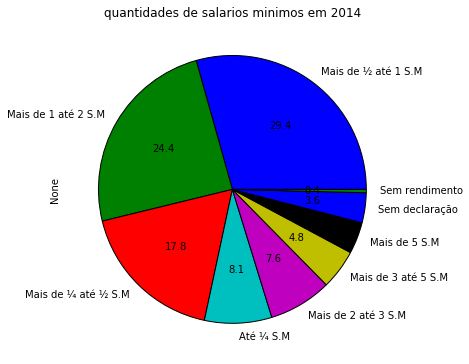

In [194]:
ut7.plot(kind='pie',title='quantidades de salarios minimos em 2014',autopct='%.1f',figsize=(6, 6))

In [195]:
print('tabela cruzada entre renda e aposentados em 2014')
tabela6=pd.crosstab(aposentados, salario,margins=True,rownames=['Aposentados'], colnames=['quantidades de salarios minimos em 2014'])
tabela6

tabela cruzada entre renda e aposentados em 2014


quantidades de salarios minimos em 2014,Sem rendimento,Até ¼ S.M,Mais de ¼ até ½ S.M,Mais de ½ até 1 S.M,Mais de 1 até 2 S.M,Mais de 2 até 3 S.M,Mais de 3 até 5 S.M,Mais de 5 S.M,Sem declaração,All
Aposentados,,,,,,,,,,
2.0,0,217,2546,12341,12101,4073,2845,2742,1749,38643
4.0,1306,21126,47930,79138,68476,21434,13151,10078,9895,273118
All,1553,29508,64576,106324,88540,27490,17260,13708,13034,362627


grafico entre a quantidade de salarios minimos e pessoas aposentados e nao aposentados em 2014


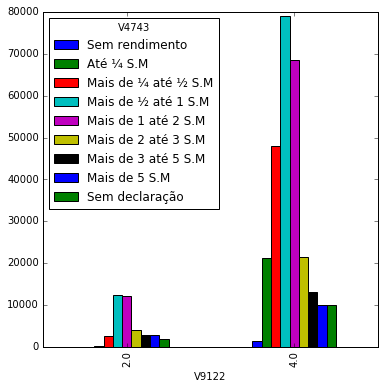

In [196]:
print('grafico entre a quantidade de salarios minimos e pessoas aposentados e nao aposentados em 2014')
pd.crosstab(aposentados, salario).plot(kind='bar',figsize=(6, 6))


In [197]:
print('tabela cruzada entre anos de estudo e aposentados em 2014 em porcentagem')
tabelap6=(tabela6/total_14*100).round(decimals=2)
tabelap6

tabela cruzada entre anos de estudo e aposentados em 2014 em porcentagem


,Sem rendimento,Até ¼ S.M,Mais de ¼ até ½ S.M,Mais de ½ até 1 S.M,Mais de 1 até 2 S.M,Mais de 2 até 3 S.M,Mais de 3 até 5 S.M,Mais de 5 S.M,Sem declaração,All
Aposentados,,,,,,,,,,
2.0,0.00,0.06,0.70,3.40,3.34,1.12,0.78,0.76,0.48,10.66
4.0,0.36,5.83,13.22,21.82,18.88,5.91,3.63,2.78,2.73,75.32
All,0.43,8.14,17.81,29.32,24.42,7.58,4.76,3.78,3.59,100.00


grafico da freq relativa da quantidade de salarios minimos para os aposentados em 2014:


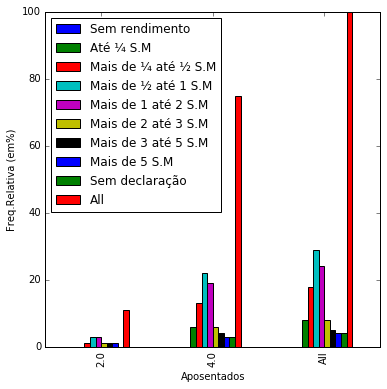

In [198]:
print('grafico da freq relativa da quantidade de salarios minimos para os aposentados em 2014:')
grafico5 = pd.crosstab(aposentados,salario,margins=True,rownames=['Aposentados'], colnames=['quantidade de salrios minimos'])
grafico5 = (grafico5/ total_14*100).round(decimals=0)
grafico5.plot(kind='bar',figsize=(6, 6))



plt.ylabel('Freq.Relativa (em%)')


## <font color='blue'>Analise da renda(em quantidades de salários minimos) de aposentados e não aposentados, em 2001 </font>

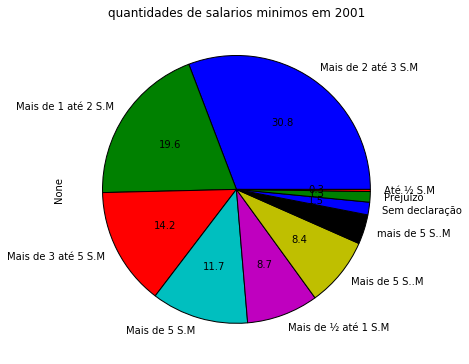

In [200]:
ut8.plot(kind='pie',title='quantidades de salarios minimos em 2001',autopct='%.1f',figsize=(6, 6))

In [201]:
print('tabela cruzada entre renda e aposentados em 2001')
tabela7=pd.crosstab(aposentados_1, salario_1,margins=True,rownames=['Aposentados'], colnames=['quantidades de salarios minimos em 2014'])
tabela7

tabela cruzada entre renda e aposentados em 2001


quantidades de salarios minimos em 2014,Até ½ S.M,Mais de ½ até 1 S.M,Mais de 1 até 2 S.M,Mais de 2 até 3 S.M,Mais de 3 até 5 S.M,Mais de 5 S.M,Mais de 5 S..M,mais de 5 S..M,Sem declaração,Prejuízo,All
Aposentados,,,,,,,,,,,
0.0,0,0,0,0,1,0,1,0,0,0,5
2.0,77,1012,1215,1342,698,682,681,409,224,257,29975
4.0,220,12005,27793,44394,20419,16799,11742,5053,2071,1724,313246
All,299,13018,29008,45737,21118,17481,12424,5462,2295,1981,378843


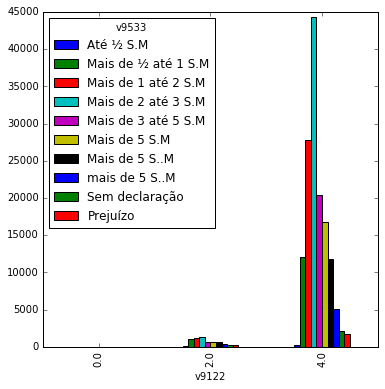

In [202]:
pd.crosstab(aposentados_1, salario_1).plot(kind='bar',figsize=(6, 6))

In [203]:
print('tabela cruzada entre anos de estudo e aposentados em 2001 em porcentagem')
tabelap7=(tabela7/total_01*100).round(decimals=2)
tabelap7.iloc[1:2,]

tabela cruzada entre anos de estudo e aposentados em 2001 em porcentagem


,Até ½ S.M,Mais de ½ até 1 S.M,Mais de 1 até 2 S.M,Mais de 2 até 3 S.M,Mais de 3 até 5 S.M,Mais de 5 S.M,Mais de 5 S..M,mais de 5 S..M,Sem declaração,Prejuízo,All
Aposentados,,,,,,,,,,,
2,0.02,0.27,0.32,0.35,0.18,0.18,0.18,0.11,0.06,0.07,7.91


grafico da freq relativa da quantidade de salarios minimos para os aposentados em 2014:


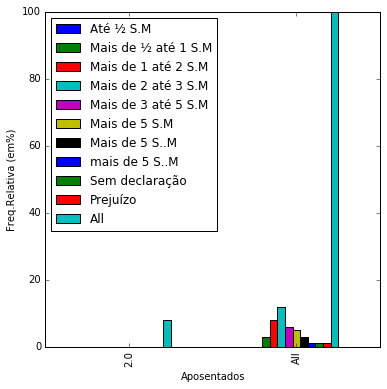

In [204]:
print('grafico da freq relativa da quantidade de salarios minimos para os aposentados em 2014:')
grafico6 = pd.crosstab(aposentados_01,salario_1,margins=True,rownames=['Aposentados'], colnames=['quantidade de salrios minimos'])
grafico6 = (grafico6/ total_01*100).round(decimals=0)

plot = grafico6.plot(kind='bar',figsize=(6, 6))


plt.ylabel('Freq.Relativa (em%)')

## Conclusão

Neste primeiro projeto chegeui a conclusão que o aumento da educação está diretamente relacionada ao aumento da quantidade de salarios minimos recebidos. Podemos ver que de 2001 apenas 17,8% dos aposentados tinham mais de 11 anos de estudos, a educaçao em 2014 quase dobrou, em 2014 34% dos aposentados tinham mais de 11 anos de estudos. E ao analisar a renda, também podemos ver um aumento significativo. Em 2001 apenas 0,47% das pessoas eram aposentadas e ganhavam mais de 5 salarios minimos. Em 2014 0,76% das pessoas eram aposentadas e ganhavam mais de 5 salarios minimos. Após analisar estas variavéis vi que o aumento da educação está envolvida com o aumento da renda
